In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Objective

In this notebook, you must do an exploratory data analysis , feature engineering, data treatment and application of Machine Learning models to predict the **RENT AMOUNT (R$)**.
I will follow this script:
1. Perform an EDA in order to gain insights and choose the best features;
2. Preprocess the data;
3. Test models and choose the best one;
4. Perform the final test with the chosen model.

# Load Data

In [ ]:
raw_data = pd.read_csv('../input/brasilian-houses-to-rent/houses_to_rent_v2.csv')
raw_data.head(20)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


The features are:
* **city** - city where the property is located
* **area** - property area
* **rooms** - quantity of rooms
* **bathroom** - quantity of bathrooms
* **parking spaces** - quantity of parking spaces
* **floor** - floor
* **animal** - acept animals?
* **furniture** - furniture?
* **hoa** - Homeowners association tax
* **property tax** - IPTU / property tax
* **rent amount** - rental price
* **fire insurance** - fire insurance
* **total** - total value


# Exploratory Data Analysis (EDA)

#### Shape

In [ ]:
print('ROWS: ', raw_data.shape[0])
print('COLUMNS: ', raw_data.shape[1])

ROWS:  10692
COLUMNS:  13


#### Basic info

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


#### Basic description

In [ ]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


#### NULL values

In [ ]:
raw_data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

As it is a Kaggle dataset, it is normal to have no null data.

### Rent amount (R$) - Analysis

#### Histogram


In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(raw_data['rent amount (R$)'])
plt.xticks(np.arange(raw_data['rent amount (R$)'].min(), raw_data['rent amount (R$)'].max(), step=3000));

NameError: ignored

There is a strong asymmetric on the right (**right skew**) and most of the rent amount is between 450,00 and 3.450,00. There is a great chance that there will be several outliers in this data, and for my business knowledge, a rental costing more than R$ **12.000,00** is something strange...

#### Boxplot

In [ ]:
plt.figure(figsize=(10, 7))

sns.boxplot(raw_data['rent amount (R$)'])
plt.xticks(np.arange(raw_data['rent amount (R$)'].min(), raw_data['rent amount (R$)'].max(), step=3000))

plt.show()

As previously stated, there are several outliers after **9.500,00**.

### City

In [ ]:
cities = raw_data['city'].unique()
cities

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

#### Histogram

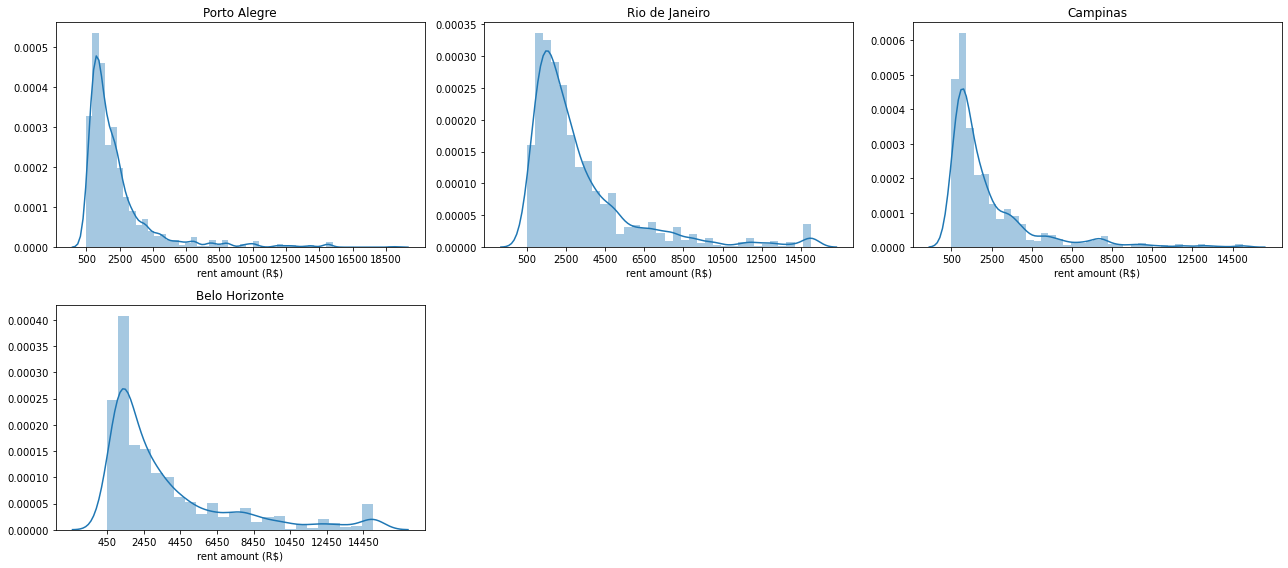

In [ ]:
plt.figure(figsize=(18, 8))

i = 1
for city in cities:
    
    if city == 'São Paulo':
        continue
    
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = raw_data.loc[raw_data['city'] == city]
    sns.distplot(city_name['rent amount (R$)'])
    plt.xticks(np.arange(city_name['rent amount (R$)'].min(), city_name['rent amount (R$)'].max(), step=2000))
    i+=1
    

plt.tight_layout()
plt.show()

rents in these 4 cities have asymmetry on the right and do not usually exceed **2.500,00**.

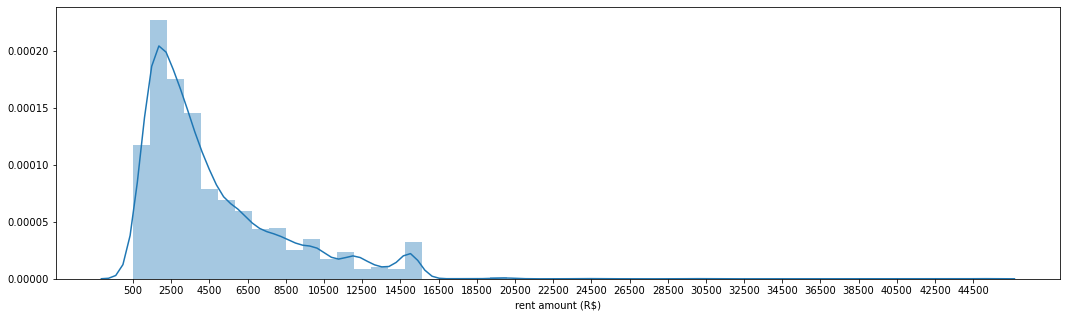

In [ ]:
plt.figure(figsize=(18, 5))

sp = raw_data.loc[raw_data['city'] == 'São Paulo']
sns.distplot(sp['rent amount (R$)'])
plt.xticks(np.arange(sp['rent amount (R$)'].min(), sp['rent amount (R$)'].max(), step=2000))

plt.show()

In São Paulo, the data remains with right skew, and most of the rental values **exceed 2,500.00** to almost **4,500.00**.

#### Boxplot

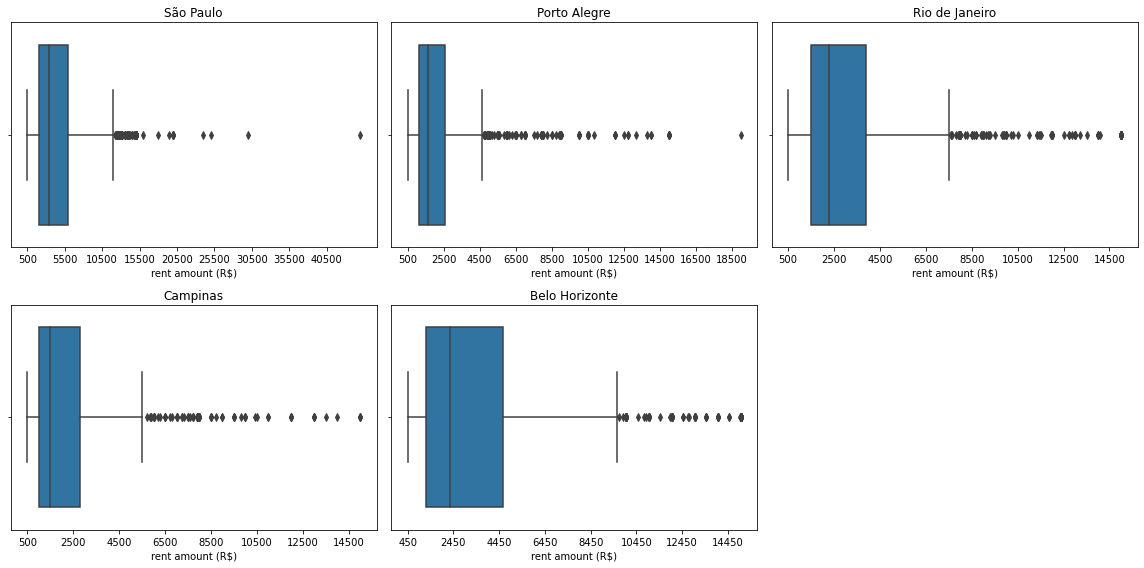

In [ ]:
plt.figure(figsize=(16, 8))

i = 1
step = 5000
for city in cities:
    if step < 2000:
        step = 2000
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = raw_data.loc[raw_data['city'] == city]
    sns.boxplot(city_name['rent amount (R$)'])
    plt.xticks(np.arange(city_name['rent amount (R$)'].min(), city_name['rent amount (R$)'].max(),
                        step=step))
    step-=3000
    i+=1

    

plt.tight_layout()
plt.show()

Disregarding outliers:
- **São Paulo**: rent amount around **500,0**0 to **12.000,00**
- **Porto Alegre**: rent amount around **500,00** to **4.500,00**
- **Rio de Janeiro**: rent amount around **500,00** to **7.500,00**
- **Campinas**: rent amount around **500,00** to **5.500,00**
- **Belo Horizonte**: rent amount around **500,00** to **9.500,00**

## Correlations

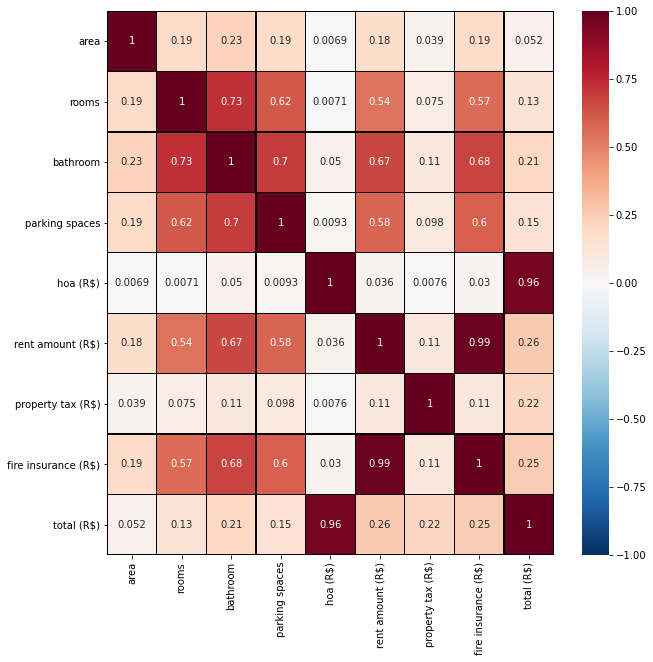

In [ ]:
plt.figure(figsize=(10, 10))

numData = raw_data._get_numeric_data()
var_num_corr = numData.corr()

sns.heatmap(var_num_corr, vmin=-1, vmax=1, annot=True, linewidth=0.01, linecolor='black', cmap='RdBu_r')

plt.show()

In [ ]:
var_num_corr['rent amount (R$)'].round(3)

area                   0.181
rooms                  0.542
bathroom               0.669
parking spaces         0.578
hoa (R$)               0.036
rent amount (R$)       1.000
property tax (R$)      0.108
fire insurance (R$)    0.987
total (R$)             0.264
Name: rent amount (R$), dtype: float64

The features that most positively influence the **rent amount** (correlation> = 0.5) are:
* rooms
* bathroom
* parking spaces
* fire insurance (R$)

I will analyze them better below:

## Analysis of important features

### rooms

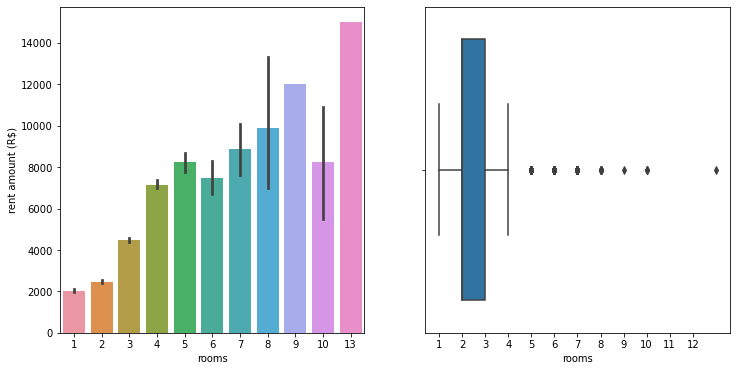

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=raw_data['rooms'], y=raw_data['rent amount (R$)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=raw_data['rooms'])
plt.xticks(np.arange(raw_data['rooms'].min(), raw_data['rooms'].max(), step=1))


plt.show()

The number of rooms usually varies between 1 and 4, and we noticed that the more rooms, the higher the rent, which is already expected. The value of 10 rooms are strange...

### Bathroom


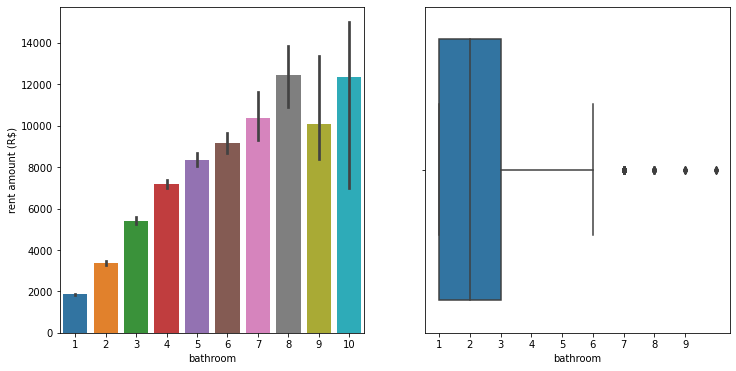

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=raw_data['bathroom'], y=raw_data['rent amount (R$)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=raw_data['bathroom'])
plt.xticks(np.arange(raw_data['bathroom'].min(), raw_data['bathroom'].max(), step=1))


plt.show()

The number of bathrooms usually varies between 1 and 6, and we noticed that the more bathrooms, the higher the rent, which is already expected. The value of 9 bathrooms are strange...

### Parking spaces

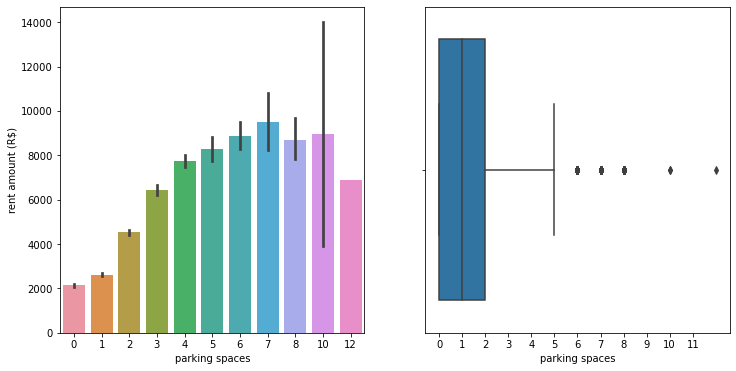

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=raw_data['parking spaces'], y=raw_data['rent amount (R$)'])

plt.subplot(1, 2, 2)
sns.boxplot(x=raw_data['parking spaces'])
plt.xticks(np.arange(raw_data['parking spaces'].min(), raw_data['parking spaces'].max(), step=1))


plt.show()

The number of parking spaces usually varies between 0 and 5, and we noticed that the more parking spaces, the higher the rent, which is already expected.The value starts to decrease from 7 parking spaces, something strange...

### Fire insurance

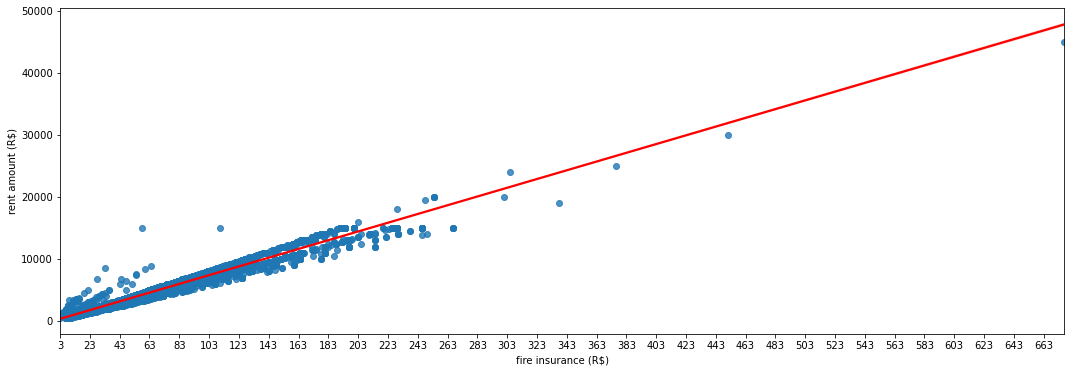

In [ ]:
plt.figure(figsize=(18, 6))

sns.regplot(x=raw_data['fire insurance (R$)'], y=raw_data['rent amount (R$)'], line_kws={'color': 'r'})
plt.xticks(np.arange(raw_data['fire insurance (R$)'].min(), raw_data['fire insurance (R$)'].max(), step=20))

plt.show()

The value of **fire insurance** has a positive influence on **rent amount**. Most of the values are between **3,00** and **200,00**.

### Furniture

In [ ]:
furniture = raw_data['furniture'].value_counts()
pd.DataFrame(furniture)

,furniture
not furnished,8086
furnished,2606


There are about 3x more unfurnished houses than furnished

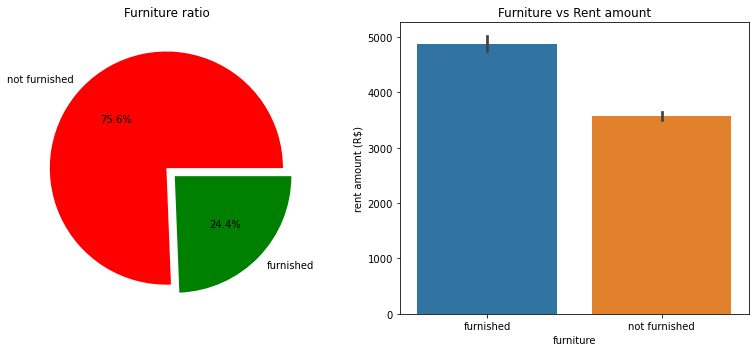

In [ ]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.title('Furniture ratio')
plt.pie(furniture, labels = ['not furnished', 'furnished'], colors= ['r', 'g'], 
        explode = (0, 0.1), autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title('Furniture vs Rent amount')
sns.barplot(x=raw_data['furniture'], y=raw_data['rent amount (R$)'])

plt.tight_layout()
plt.show()

The fact that the house **is furnished** increases **the rent amount**

## Analysis of *not so important* features

### Animal

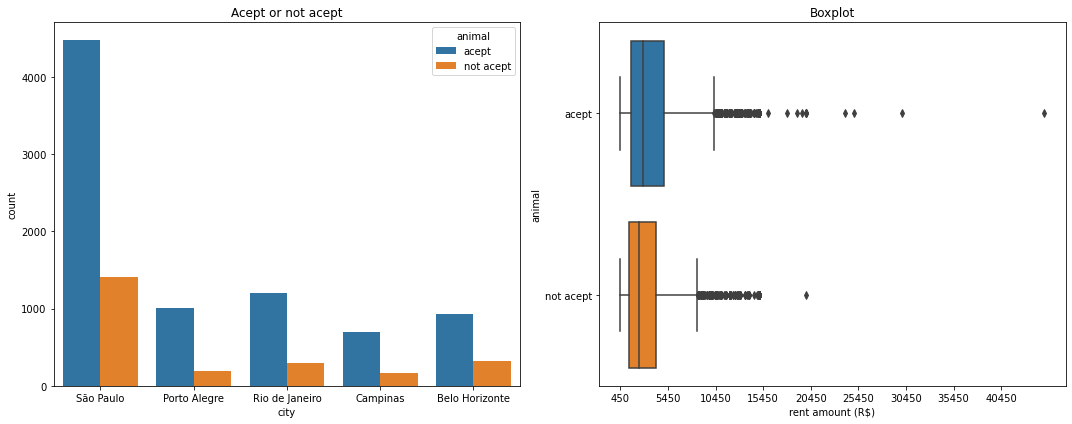

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Acept or not acept')
sns.countplot(raw_data['city'], hue=raw_data['animal'])

plt.subplot(1, 2, 2)
plt.title('Boxplot')
sns.boxplot(x=raw_data['rent amount (R$)'], y=raw_data['animal'])
plt.xticks(np.arange(raw_data['rent amount (R$)'].min(), raw_data['rent amount (R$)'].max(), step=5000))

plt.tight_layout()
plt.show()

Whether or not to accept animals in the price has a small influence on the increase the **rent amount**.

### hoa

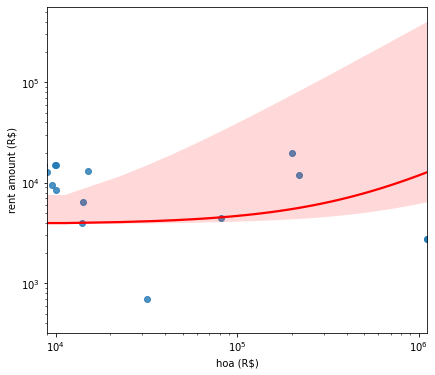

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=raw_data['hoa (R$)'], y=raw_data['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

plt.show()

There doesn't seem to be much correlation between the **hoa** and the **rent price**.

### Property tax

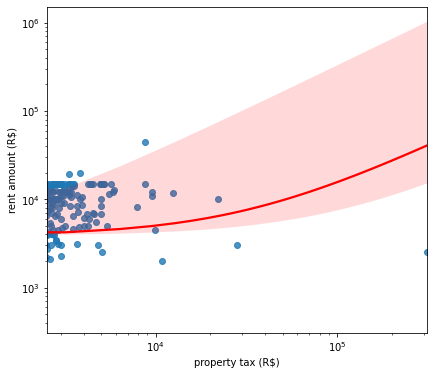

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=raw_data['property tax (R$)'], y=raw_data['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

plt.show()

There doesn't seem to be much correlation between the **property tax** and the **rent price**.

### Area

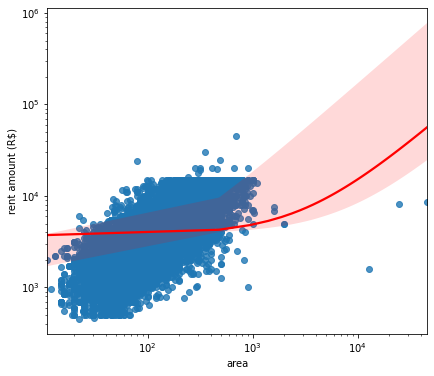

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=raw_data['area'], y=raw_data['rent amount (R$)'], line_kws={'color': 'r'})
plt.xscale('log')
plt.yscale('log')

plt.show()

There doesn't seem to be much correlation between the **area** and the **rent price**.

# Testing ML models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import gp_minimize

# ML models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

As this is a continuous value forecast, I will use regression models.

In this first moment, I will remove the outliers from the data using the interquartile range.

### rent price (R$) with outliers

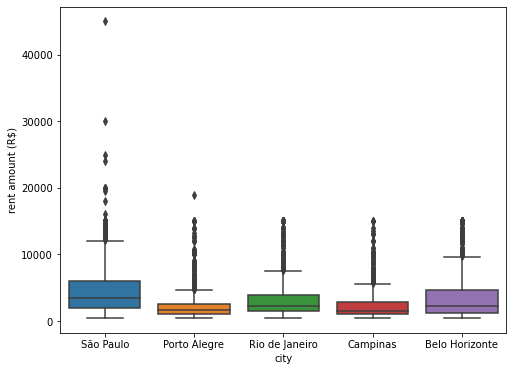

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(raw_data['city'], raw_data['rent amount (R$)'])

plt.show()

Maximum rental prices do not usually exceed **15.000**, but with outliers they reach **40.000**.

### Select quantiles

In [ ]:
# Grouping cities
city_group = raw_data.groupby('city')['rent amount (R$)']

In [ ]:
# Quantile 1 = 25% of data
Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)

# IQR = Interquartile Range
IQR = Q3 - Q1

# Limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

### Remove outliers

In [ ]:
# DataFrame to store the new data
new_data = pd.DataFrame()

for city in city_group.groups.keys():
    is_city = raw_data['city'] == city
    accepted_limit = ((raw_data['rent amount (R$)'] >= lower[city]) &
                     (raw_data['rent amount (R$)'] <= upper[city]))
    
    select = is_city & accepted_limit
    data_select = raw_data[select]
    new_data = pd.concat([new_data, data_select])

new_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
42,Belo Horizonte,200,4,2,1,7,not acept,not furnished,850,2550,9,34,3443
43,Belo Horizonte,45,1,1,1,5,acept,not furnished,500,1631,192,12,2335
46,Belo Horizonte,100,3,1,0,13,not acept,not furnished,700,1220,10,17,1947


### Comparation

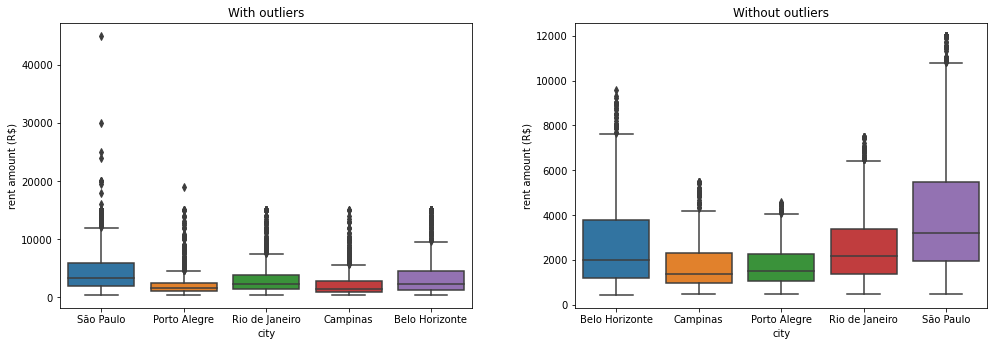

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('With outliers')
sns.boxplot(raw_data['city'], raw_data['rent amount (R$)'])

plt.subplot(1, 2, 2)
plt.title('Without outliers')
sns.boxplot(new_data['city'], new_data['rent amount (R$)'])

plt.tight_layout(pad=5.0)
plt.show()

Much better!
P.S. Thanks to [Samuel Natividade](http://www.kaggle.com/juxwzera) for the very useful notebook.

### Train new data without outliers

#### Categorical columns handler

In [ ]:
catTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#### Numerical columns handler

In [ ]:
numTransformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#### Select FEATURES (X)

In [ ]:
cols = ['city', 'rooms', 'bathroom', 'parking spaces', 'fire insurance (R$)',
        'furniture']

X = new_data[cols]
X.head()

,city,rooms,bathroom,parking spaces,fire insurance (R$),furniture
21,Belo Horizonte,1,1,1,36,furnished
27,Belo Horizonte,2,2,1,20,not furnished
42,Belo Horizonte,4,2,1,34,not furnished
43,Belo Horizonte,1,1,1,12,not furnished
46,Belo Horizonte,3,1,0,17,not furnished


In [ ]:
for col in X:
    X = X.astype('category')
X['fire insurance (R$)'] = X['fire insurance (R$)'].astype('int64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 21 to 10691
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   city                 9974 non-null   category
 1   rooms                9974 non-null   category
 2   bathroom             9974 non-null   category
 3   parking spaces       9974 non-null   category
 4   fire insurance (R$)  9974 non-null   int64   
 5   furniture            9974 non-null   category
dtypes: category(5), int64(1)
memory usage: 526.0 KB


#### Select TARGET (y)

In [ ]:
y = new_data['rent amount (R$)']
y

21        2690
27        1500
42        2550
43        1631
46        1220
         ...  
10680     2200
10681    11000
10683     4000
10685     7521
10691     1400
Name: rent amount (R$), Length: 9974, dtype: int64

#### Select numerical features

In [ ]:
numFeatures = X.select_dtypes(include=['int64', 'float64']).columns
numFeatures

Index(['fire insurance (R$)'], dtype='object')

#### Select categorical features

In [ ]:
catFeatures = X.select_dtypes(include=['category']).columns
catFeatures

Index(['city', 'rooms', 'bathroom', 'parking spaces', 'furniture'], dtype='object')

#### Handling numerical and categorical features

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numTransformer, numFeatures),
        ('categoric', catTransformer, catFeatures)
    ])

#### Select TRAIN and TEST data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### List of ML models

In [ ]:
regressors = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    LinearRegression(),
    XGBRegressor()
]

#### Fit all ML models and select best

In [ ]:
# Seed
np.random.seed(42)

for regressor in regressors:
    
    estimator = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    estimator.fit(X_train, y_train)
    preds = estimator.predict(X_test)
    
    print(regressor)

    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))
    print('-' * 40)

DecisionTreeRegressor()
MAE: 145.045926856664
RMSE: 382.5919790806073
R2: 0.9772624104086012
----------------------------------------
RandomForestRegressor()
MAE: 144.84612135484693
RMSE: 306.06607930325794
R2: 0.9854486561940762
----------------------------------------
SVR()
MAE: 1432.3319511510615
RMSE: 2249.739934393611
R2: 0.21379222159854927
----------------------------------------
LinearRegression()
MAE: 223.54410676027936
RMSE: 360.8135479518457
R2: 0.9797773356396169
----------------------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_w

In this specific case, **XGBoost** showed better results compared to the other models.

## RandomizedSearchCV with the best model (XGBRegressor)

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', XGBRegressor(random_state=42))
                      ])

In [ ]:
params = {
        'model__learning_rate': np.arange(0.01, 0.1),
        'model__n_estimators': np.arange(100, 1000, step=50),
        'model__max_depth': np.arange(1, 20, step=2),
        'model__subsample': [0.8, 0.9, 1],
        'model__colsample_bytree': [0.8, 0.9, 1],
        'model__gamma': [0, 1, 3, 5]
         }

In [ ]:
estimator = RandomizedSearchCV(pipe, cv=20, param_distributions=params, n_jobs=-1)
estimator.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=20,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['fire insurance (R$)'], dtype='object')),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               Index(['city', 'rooms', 'bathroom', 'parking spaces', '

In [ ]:
estimator.best_params_

{'model__subsample': 1,
 'model__n_estimators': 950,
 'model__max_depth': 5,
 'model__learning_rate': 0.01,
 'model__gamma': 0,
 'model__colsample_bytree': 0.8}

#### Train with the best model and best params 

In [ ]:
estimator = XGBRegressor(colsample_bytree=0.8,
                           gamma=0, 
                           learning_rate=0.01, 
                           max_depth=5, 
                           n_estimators=950, 
                           subsample=1)

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', estimator)
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['fire insurance (R$)'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['city', 'rooms', 'bathroom', 'parking spaces', 'furniture'], dtype='object'))])),
                ('model',
                 XGBRegressor...
                              colsample_bytree=0.8, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_r

#### Predictions

In [ ]:
preds = model.predict(X_test)

#### Evaluate

In [ ]:
print('MAE:', mean_absolute_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
print('R2:', r2_score(y_test, preds))

MAE: 174.4577116619674
RMSE: 292.1701484926418
R2: 0.9867399737451238


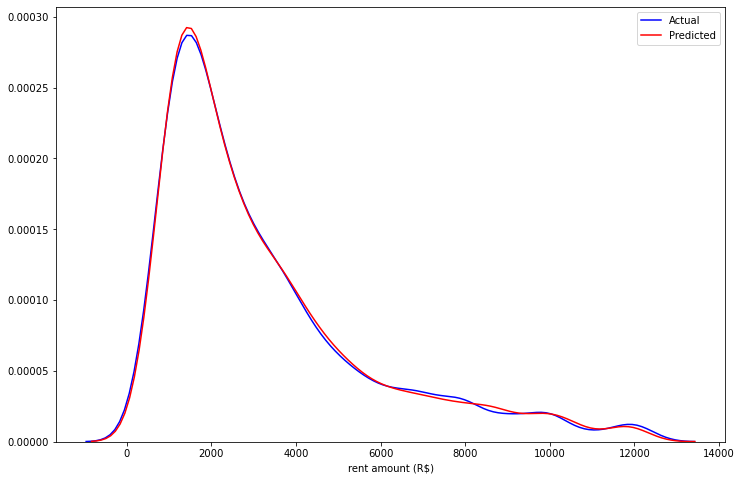

In [ ]:
plt.figure(figsize=(12, 8))

sns.distplot(y_test, hist=False, color='b', label ='Actual')
sns.distplot(preds, hist=False, color='r', label = 'Predicted')

plt.show()

Although the model predicted higher values in the range of 2.000,00, it seems to do a good job of forecasting the other values.

# Save model

In [ ]:
from joblib import dump, load
dump(model, 'model_2.joblib')
model = load('model_2.joblib')